In [90]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
#from IPython.testing.tools import help_output_test
#hello there does this update at all?


class down(nn.Module):
    def __init__(self, in_channels, out_channels):
        super().__init__()
        self.conv1 = nn.Conv2d(in_channels, int(round((out_channels+in_channels)/2)), kernel_size=3, padding=1)
        print(self.conv1.weight.shape)
        self.conv2 = nn.Conv2d(int(round((out_channels+in_channels)/2)), out_channels, kernel_size=3, padding=1)
        print(self.conv2.weight.shape)
        
        print(' ')
        
        self.fc1 = nn.Linear(in_features=16, out_features=14)#16 arbituarily works
        print(self.fc1.weight.shape)
        self.fc2 = nn.Linear(in_features=14, out_features=12)
        print(self.fc2.weight.shape)
        self.out = nn.Linear(in_features=12, out_features=10)#if I set out features to one then I get a 1x10 but all have the same value which is wierd
        print(self.out.weight.shape)


    def forward(self, t):
        print(t.shape)
        t = F.max_pool2d(t, kernel_size=3, stride=2, padding=1)
        print(t.shape)
        t = self.conv1(t)
        print(t.shape)
        t = F.relu(t)
        print(t.shape)
        #        print(t.shape)
        t.flatten()

        t = self.conv2(t)
        print(t.shape)
        t = F.relu(t)
        print(t.shape)
        
        t = self.fc1(t)
        print(t.shape)
        t = F.relu(t)
        #print(t.shape)
        t = self.fc2(t)
        t = F.relu(t)
        #print(t.shape)
        t = self.out(t)
        t = F.relu(t)
        #print(t.shape)
        
        #        print(t.shape)

        return t

In [91]:
network = down(1,6)

torch.Size([4, 1, 3, 3])
torch.Size([6, 4, 3, 3])
 
torch.Size([14, 16])
torch.Size([12, 14])
torch.Size([10, 12])


In [92]:
real_samples_labels = torch.randint(0,100,(1,1,32, 32), dtype=torch.float32)

In [93]:
out = network(real_samples_labels)

torch.Size([1, 1, 32, 32])
torch.Size([1, 1, 16, 16])
torch.Size([1, 4, 16, 16])
torch.Size([1, 4, 16, 16])
torch.Size([1, 6, 16, 16])
torch.Size([1, 6, 16, 16])
torch.Size([1, 6, 16, 14])


In [94]:
print(out.shape)

torch.Size([1, 6, 16, 10])


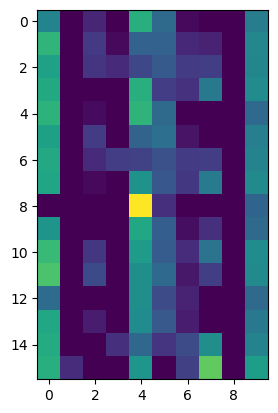

In [95]:
import matplotlib.pyplot as plt
plt.imshow(out[0,0,:,:].detach())